# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [3]:
# your code here
df.drop(columns=['Id'], inplace=True)

You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [4]:
# your code here
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
#missing_value_df.sort_values(by='percent_missing', ascending=False)
missing_value_df.loc[missing_value_df['percent_missing']>20]

,column_name,percent_missing
Alley,Alley,93.767123
FireplaceQu,FireplaceQu,47.260274
PoolQC,PoolQC,99.520548
Fence,Fence,80.753425
MiscFeature,MiscFeature,96.301370


#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [5]:
# your code here
col=list(missing_value_df.loc[missing_value_df['percent_missing']>20].index)
df.drop(columns=col, inplace=True)

In [6]:
df.shape

(1460, 75)

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

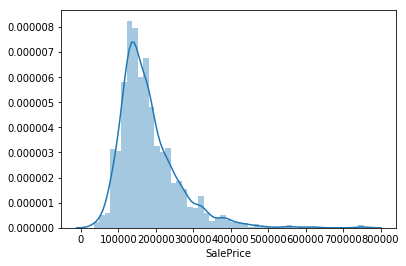

In [7]:
# your code here
#Price distribution
sns.distplot(df.SalePrice)
plt.show ()

In [8]:
# your comment here
#It seems there is some skewness
from scipy import stats
stats.skew(df.SalePrice, axis=0, bias=True)

1.880940746034036

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

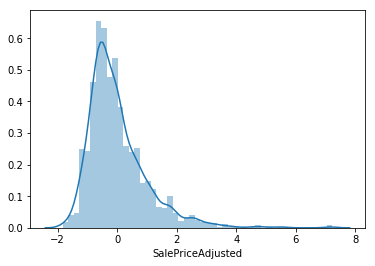

1.8809407460340362

In [57]:
# your code here

df['SalePriceAdjusted'] = (df.SalePrice - df.SalePrice.mean()) / df.SalePrice.std()
sns.distplot(df.SalePriceAdjusted)
plt.show ()
#Not normally distributed
stats.skew(df.SalePriceAdjusted, axis=0, bias=True)
#did not change the skewness

In [59]:
import numpy as np

In [60]:
df_exp = df.apply(np.log)   # pd.DataFrame.apply accepts a function to apply to each column of the data
df_exp.plot.hist(alpha=0.5, bins=15, grid=True, legend=None)
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

AttributeError: 'str' object has no attribute 'log'

## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [13]:
current_year=2019
df['Age']=current_year - df.YearBuilt
df['RemodeledAge']=current_year - df.YearRemodAdd

df['RoomsNb'] = df.BedroomAbvGr + df.KitchenAbvGr + df.FullBath + df.HalfBath * 0.5 + df.BsmtFullBath + df.BsmtHalfBath * 0.5

In [16]:
# your code here
# add cells as needed

col_to_keep = ['GrLivArea', 'LotArea', 'GarageArea', 'Neighborhood', 'Age', 'RemodeledAge', 'RoomsNb', 'SalePrice']

sub_df=df[col_to_keep]

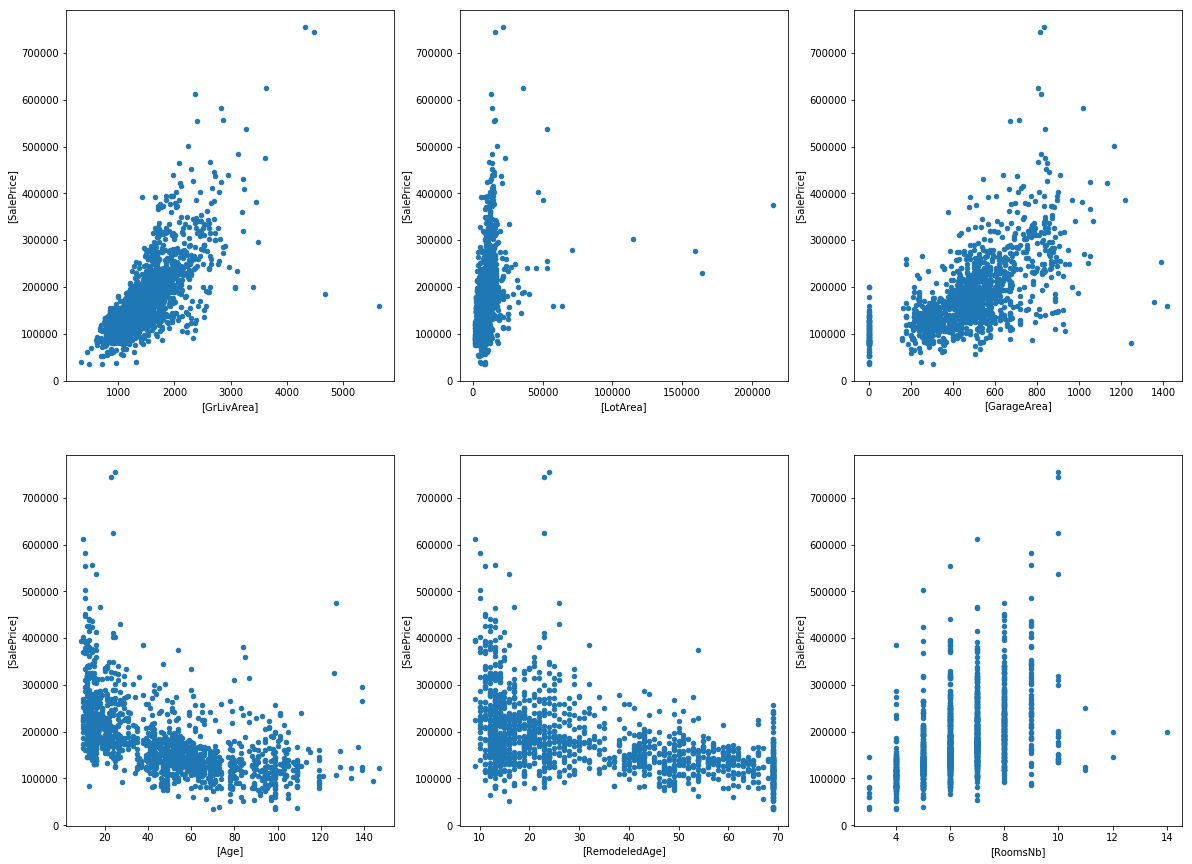

In [32]:
# your code here
fig, axes = plt.subplots(2, 3, figsize=(20,15))

df.plot(x=['GrLivArea'], y=["SalePrice"], kind="scatter", ax=axes[0,0])
df.plot(x=['LotArea'], y=["SalePrice"], kind="scatter", ax=axes[0,1])
df.plot(x=['GarageArea'], y=["SalePrice"], kind="scatter", ax=axes[0,2])
df.plot(x=['Age'], y=["SalePrice"], kind="scatter", ax=axes[1,0])
df.plot(x=['RemodeledAge'], y=["SalePrice"], kind="scatter", ax=axes[1,1])
df.plot(x=['RoomsNb'], y=["SalePrice"], kind="scatter", ax=axes[1,2])

In [39]:
room_nb_median = df[['SalePrice','RoomsNb']].groupby(['RoomsNb']).agg('median')
room_nb_median.plot.bar()

,SalePrice
RoomsNb,
3,68500
4,109700
5,133000
6,157000
7,180500
8,211500
9,260000
10,183500
11,125000


In [ ]:
#sns.pairplot(sub_df, hue='SalePrice')

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

Text(0.5, 1.0, 'Correlation matrix')

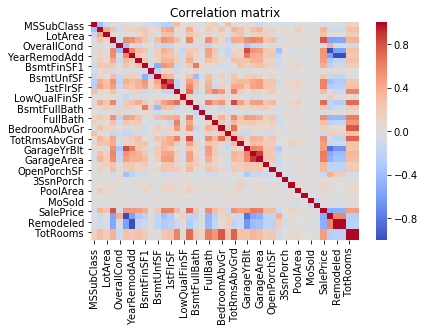

In [40]:
# your code here
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlation matrix')

In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [ ]:
# your comment here
'''OverallQual
TotalBathrooms
Age
RemodeledAge'''

In [42]:
print(df.corr().loc['SalePrice',:].sort_values())

Age             -0.522897
RemodeledAge    -0.507101
Remodeled       -0.507101
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
RoomsNb          0.470702
TotRooms         0.470702
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars  

## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [ ]:
# your responses here
# add cells as needed

Factor 1 : OverallQual
Highly positively correlated to sale price.
It means that higher the house quality higher the sale price.
Logical as we expect to pay more for a better quality house.

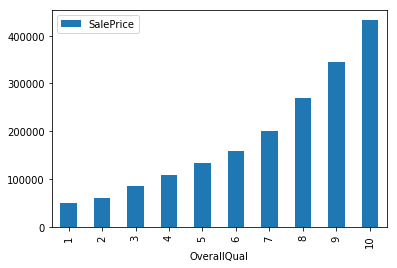

In [45]:
#graph that show that
#df.OverallQual
overallqual_median = df[['SalePrice','OverallQual']].groupby(['OverallQual']).agg('median')
overallqual_median.plot.bar()

Factor 2 : Age
Highly negatively correlated to sale price.
It means that younger the house is higher the sale price is.
Logical as the house will deteriorate when it gets old and hence people will pay less for old house that might need some fitting works.

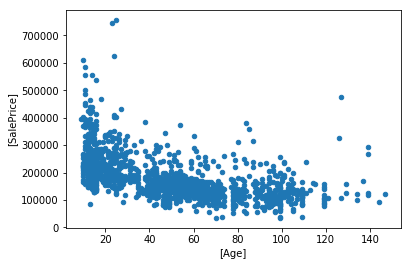

In [50]:
#graph that show that
df.plot(x=['Age'], y=["SalePrice"], kind="scatter")

Factor 3 : GarageArea
Positively correlated to sale price.
It means that more garage area there is higher the sale price is.
Logical as if the house have a big garage, it means that the house surface will be proportional. More surface in total means a higher price. The opposite is not true as a big house won't necessarily have a garage.

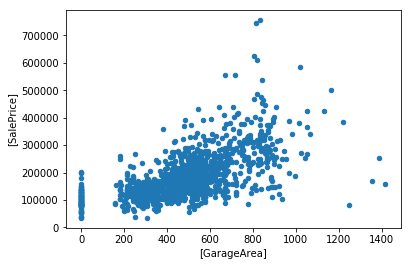

In [51]:
#graph that show that
df.plot(x=['GarageArea'], y=["SalePrice"], kind="scatter")

Factor 4 : GrLivArea
Positively correlated to sale price.
It means that more living area above ground there is higher the price is.
Logical as people will pay more for space and even more if it is above ground.

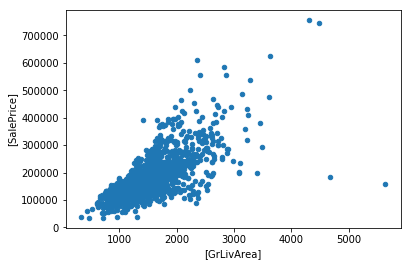

In [52]:
#graph that show that
df.plot(x=['GrLivArea'], y=["SalePrice"], kind="scatter")

Factor 5 : RoomsNb
Positively correlated to sale price.
It means that more rooms there are higher the price is.
Logical as usually more rooms you have more space (area) there is in the house.

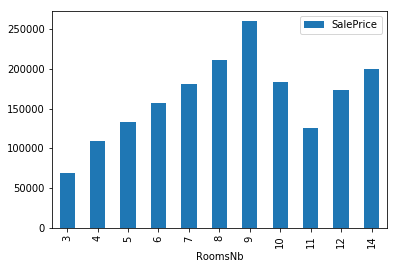

In [49]:
#graph that show that
roomsnb_median = df[['SalePrice','RoomsNb']].groupby(['RoomsNb']).agg('median')
roomsnb_median.plot.bar()